Выбрана хромосома 2L и участок  7 000 000 - 8 500 000

---



In [ ]:
!pip install -q condacolab
!pip install cooler
!pip install cooltools
!pip install hicrep

In [1]:
import condacolab
condacolab.install()
import cooler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool
import cooltools
from cooltools import insulation
import cooltools.lib.plotting
from google.colab import drive
drive.mount('/content/drive')

✨🍰✨ Everything looks OK!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
mcool1 = '/content/drive/MyDrive/HiC/hic/HiC1.dm3.mapq_30.1000.mcool'
mcool2 = '/content/drive/MyDrive/HiC/hic/HiC2.dm3.mapq_30.1000.mcool'
mcool3 = '/content/drive/MyDrive/HiC/hic/HiC3.dm3.mapq_30.1000.mcool'
mcool4 = '/content/drive/MyDrive/HiC/hic/HiC4.dm3.mapq_30.1000.mcool'

In [5]:
resolution = 20000
clr1 = cooler.Cooler(f'{mcool1}::resolutions/{resolution}')
clr2 = cooler.Cooler(f'{mcool2}::resolutions/{resolution}')
clr3 = cooler.Cooler(f'{mcool3}::resolutions/{resolution}')
clr4 = cooler.Cooler(f'{mcool4}::resolutions/{resolution}')

a. получить информацию и атрибуты матрицы Hi-C с помощью cooler.info

In [6]:
clr1.info

{'bin-size': 20000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-06T04:39:00.281457',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 6024,
 'nchroms': 7,
 'nnz': 7122786,
 'storage-mode': 'symmetric-upper',
 'sum': 63912926}

In [7]:
clr2.info

{'bin-size': 20000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-06T04:16:47.610855',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 6024,
 'nchroms': 7,
 'nnz': 7386462,
 'storage-mode': 'symmetric-upper',
 'sum': 61819050}

In [8]:
clr3.info

{'bin-size': 20000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-06T04:23:11.844138',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 6024,
 'nchroms': 7,
 'nnz': 4852836,
 'storage-mode': 'symmetric-upper',
 'sum': 62878716}

In [9]:
clr4.info

{'bin-size': 20000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-06T04:53:24.060433',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 6024,
 'nchroms': 7,
 'nnz': 5689703,
 'storage-mode': 'symmetric-upper',
 'sum': 74497702}

b. открыть объект cooler как сбалансированную матрицу для внутрихромосомных контактов


Матрица 1(из файла HiC1.dm3.mapq_30.1000.mcool)
[[9.68142023e-01 9.40535627e-02 4.77885096e-02 ... 5.17570575e-04
             nan            nan]
 [9.40535627e-02 9.88298164e-01 2.19997929e-01 ... 0.00000000e+00
             nan            nan]
 [4.77885096e-02 2.19997929e-01 1.26990154e+00 ... 2.86009344e-04
             nan            nan]
 ...
 [5.17570575e-04 0.00000000e+00 2.86009344e-04 ... 1.36600131e+00
             nan            nan]
 [           nan            nan            nan ...            nan
             nan            nan]
 [           nan            nan            nan ...            nan
             nan            nan]]
График


<ipython-input-36-3edd276cbaac>:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(matr1[425:500,425:500]),cmap='coolwarm')


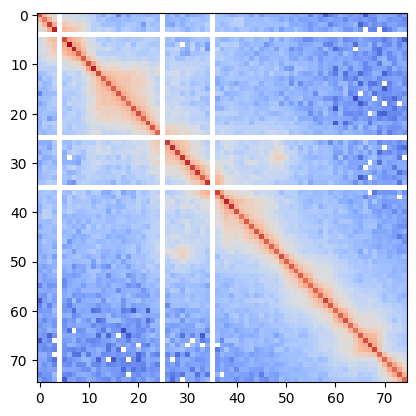

In [36]:
matr1 = clr1.matrix(balance=True).fetch('chr2L')
print("Матрица 1(из файла HiC1.dm3.mapq_30.1000.mcool)")
print(matr1)
print("График")
plt.imshow(np.log(matr1[425:500,425:500]),cmap='coolwarm')

Матрица 2(из файла HiC2.dm3.mapq_30.1000.mcool)
[[0.81745796 0.09446655 0.05287269 ... 0.                nan        nan]
 [0.09446655 0.81618967 0.24798203 ... 0.                nan        nan]
 [0.05287269 0.24798203 1.13644538 ... 0.                nan        nan]
 ...
 [0.         0.         0.         ... 1.00544333        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
График


<ipython-input-37-8bb9e1b3510c>:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(matr2[425:500,425:500]),cmap='coolwarm')


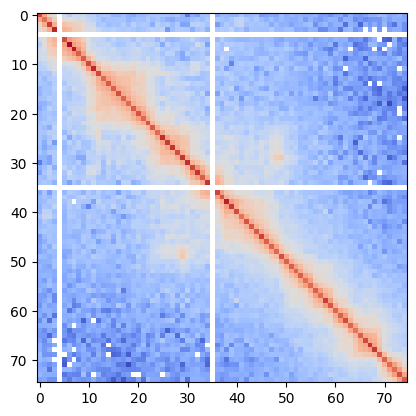

In [37]:
matr2 = clr2.matrix(balance=True).fetch('chr2L')
print("Матрица 2(из файла HiC2.dm3.mapq_30.1000.mcool)")
print(matr2)
print("График")
plt.imshow(np.log(matr2[425:500,425:500]),cmap='coolwarm')

Матрица 3(из файла HiC3.dm3.mapq_30.1000.mcool)
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.80477616        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
График


<ipython-input-38-59de155a5fb2>:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(matr3[425:500,425:500]),cmap='coolwarm')


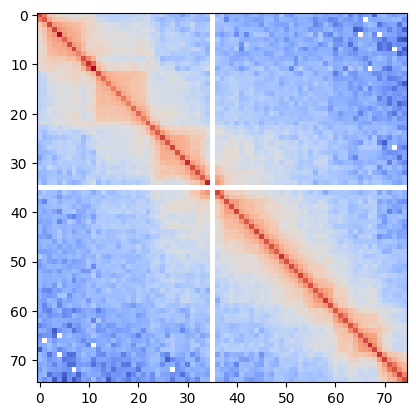

In [38]:
matr3 = clr3.matrix(balance=True).fetch('chr2L')
print("Матрица 3(из файла HiC3.dm3.mapq_30.1000.mcool)")
print(matr3)
print("График")
plt.imshow(np.log(matr3[425:500,425:500]),cmap='coolwarm')

Матрица 4(из файла HiC4.dm3.mapq_30.1000.mcool)
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.63614246        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
График


<ipython-input-39-0d3eba843f49>:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(matr4[425:500,425:500]),cmap='coolwarm')


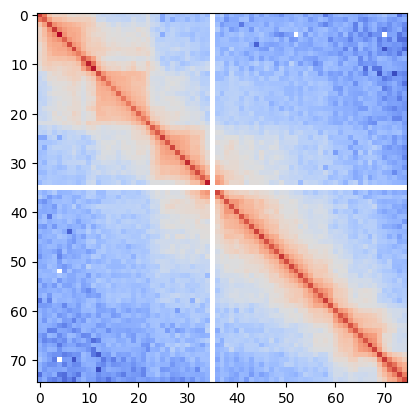

In [39]:
matr4 = clr4.matrix(balance=True).fetch('chr2L')
print("Матрица 4(из файла HiC4.dm3.mapq_30.1000.mcool)")
print(matr4)
print("График")
plt.imshow(np.log(matr4[425:500,425:500]),cmap='coolwarm')

c. получить таблицу с координатами и контактами, они сбалансированные или нет?


In [23]:
pix1 = clr1.pixels(join=True)[:]
print("Для матрицы 1(из файла HiC1.dm3.mapq_30.1000.mcool)")
print(pix1)
print("\n")

pix2 = clr2.pixels(join=True)[:]
print("Для матрицы 2(из файла HiC2.dm3.mapq_30.1000.mcool)")
print(pix2)
print("\n")

pix3 = clr3.pixels(join=True)[:]
print("Для матрицы 3(из файла HiC3.dm3.mapq_30.1000.mcool)")
print(pix3)
print("\n")

pix4 = clr4.pixels(join=True)[:]
print("Для матрицы 1(из файла HiC4.dm3.mapq_30.1000.mcool)")
print(pix4)

Для матрицы 1(из файла HiC1.dm3.mapq_30.1000.mcool)
        chrom1    start1      end1 chrom2    start2      end2  count
0        chr2L         0     20000  chr2L         0     20000   4075
1        chr2L         0     20000  chr2L     20000     40000    481
2        chr2L         0     20000  chr2L     40000     60000    182
3        chr2L         0     20000  chr2L     60000     80000    183
4        chr2L         0     20000  chr2L     80000    100000     84
...        ...       ...       ...    ...       ...       ...    ...
7122781   chrX  22380000  22400000   chrX  22420000  22422827     14
7122782   chrX  22400000  22420000   chrX  22400000  22420000   1694
7122783   chrX  22400000  22420000   chrX  22420000  22422827     27
7122784   chrX  22420000  22422827   chrX  22420000  22422827    244
7122785   chrM         0     19517   chrM         0     19517     99

[7122786 rows x 7 columns]


Для матрицы 2(из файла HiC2.dm3.mapq_30.1000.mcool)
        chrom1    start1      end1 chr

Ответ: В колонке count данные дополнительно не обработаны, поэтому их вполне можно назвать несбалансированными.

d. получить таблицу в командной строке командой *cooler dump*


In [25]:
!cooler dump -H $mcool1::resolutions/20000 > /content/drive/MyDrive/coolerAnswer/coolerInfo1.tcv
!cooler dump -H $mcool2::resolutions/20000 > /content/drive/MyDrive/coolerAnswer/coolerInfo2.tcv
!cooler dump -H $mcool3::resolutions/20000 > /content/drive/MyDrive/coolerAnswer/coolerInfo3.tcv
!cooler dump -H $mcool4::resolutions/20000 > /content/drive/MyDrive/coolerAnswer/coolerInfo4.tcv

e. посмотрите таблицу с бинами, какие столбцы там присутствуют?


In [27]:
bins1 = clr1.bins()[:]
print("Для матрицы 1(из файла HiC1.dm3.mapq_30.1000.mcool)")
print(bins1)
print("\n")


bins2 = clr2.bins()[:]
print("Для матрицы 2(из файла HiC2.dm3.mapq_30.1000.mcool)")
print(bins2)
print("\n")

bins3 = clr3.bins()[:]
print("Для матрицы 3(из файла HiC3.dm3.mapq_30.1000.mcool)")
print(bins3)
print("\n")

bins4 = clr4.bins()[:]
print("Для матрицы 4(из файла HiC4.dm3.mapq_30.1000.mcool)")
print(bins4)

Для матрицы 1(из файла HiC1.dm3.mapq_30.1000.mcool)
      chrom     start       end    weight
0     chr2L         0     20000  0.015414
1     chr2L     20000     40000  0.012686
2     chr2L     40000     60000  0.017035
3     chr2L     60000     80000  0.010652
4     chr2L     80000    100000  0.010251
...     ...       ...       ...       ...
6019   chrX  22360000  22380000  0.028927
6020   chrX  22380000  22400000  0.020546
6021   chrX  22400000  22420000  0.040442
6022   chrX  22420000  22422827       NaN
6023   chrM         0     19517  2.949650

[6024 rows x 4 columns]


Для матрицы 2(из файла HiC2.dm3.mapq_30.1000.mcool)
      chrom     start       end    weight
0     chr2L         0     20000  0.014696
1     chr2L     20000     40000  0.012197
2     chr2L     40000     60000  0.016971
3     chr2L     60000     80000  0.010794
4     chr2L     80000    100000  0.010024
...     ...       ...       ...       ...
6019   chrX  22360000  22380000  0.026751
6020   chrX  22380000  224000

f. постройте кривые зависимости число контактов от расстояния для выбранной хромосомы (в логарифмических-координатах) для 4х реплик. Сравните их.


Сначала создадим общий график для более удобного сравнения

<ipython-input-32-c552d9c050c2>:6: RuntimeWarning: Mean of empty slice
  z[i] = np.nanmean(np.diagonal(matr, i))
<ipython-input-32-c552d9c050c2>:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(matr))*resolution, np.log(z), label=name)


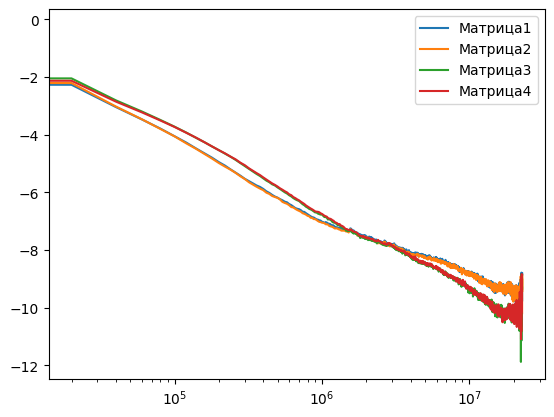

In [32]:
matrs = {'Матрица1': matr1, 'Матрица2': matr2, 'Матрица3': matr3, 'Матрица4': matr4}

for name, matr in matrs.items():
    z = np.zeros(len(matr))
    for i in range(len(matr)):
        z[i] = np.nanmean(np.diagonal(matr, i))
    plt.plot(np.arange(len(matr))*resolution, np.log(z), label=name)

plt.xscale('log')
plt.legend()
plt.show()

Теперь создадим отдельные графики

<ipython-input-33-eb3722c7f930>:6: RuntimeWarning: Mean of empty slice
  z[i] = np.nanmean(np.diagonal(matr, i))
<ipython-input-33-eb3722c7f930>:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(matr))*resolution, np.log(z))


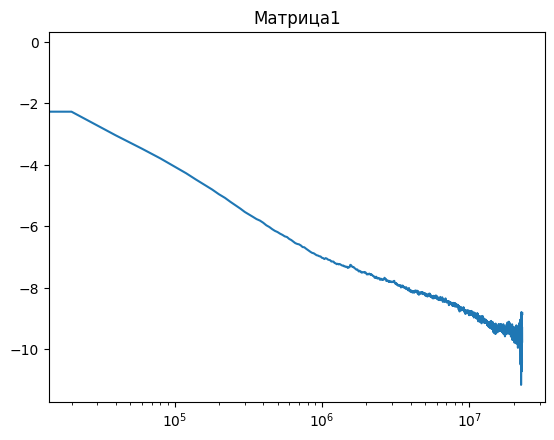

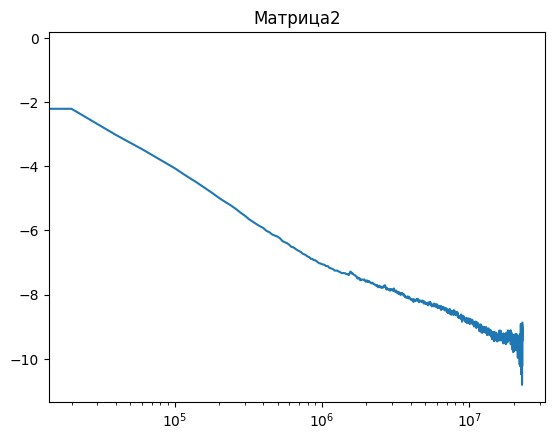

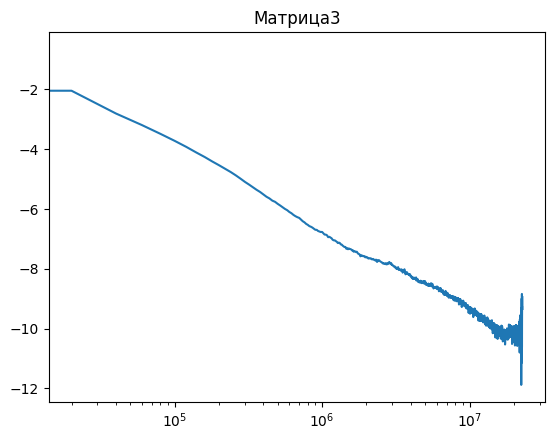

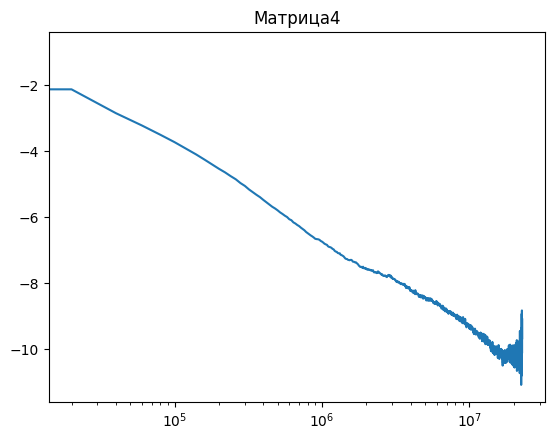

In [33]:
matrs = {'Матрица1': matr1, 'Матрица2': matr2, 'Матрица3': matr3, 'Матрица4': matr4}

for name, matr in matrs.items():
    z = np.zeros(len(matr))
    for i in range(len(matr)):
        z[i] = np.nanmean(np.diagonal(matr, i))

    plt.figure()
    plt.plot(np.arange(len(matr))*resolution, np.log(z))
    plt.xscale('log')
    plt.title(name)
    plt.show()
